In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%opts magic unavailable (pyparsing cannot be imported)
%compositor magic unavailable (pyparsing cannot be imported)


In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_market_data)

In [7]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index

df_scaled = pd.DataFrame(df_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Display sample data
print(df_scaled.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [10]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the scaled data
    kmeans.fit(df_scaled)
    
    # 3. Append the model's inertia to the inertia list
    inertia_values.append(kmeans.inertia_)

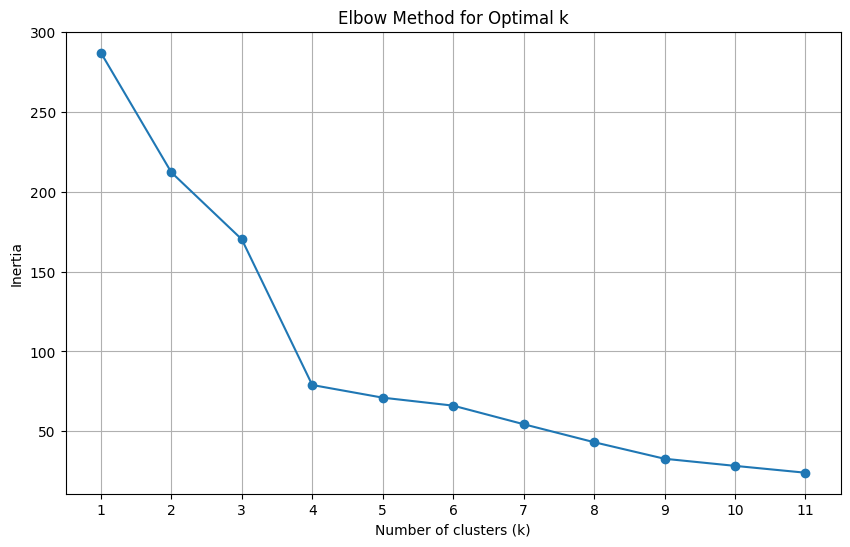

In [12]:
import matplotlib.pyplot as plt
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame({
    'k': k_values,
    'inertia': inertia_values
})
plt.figure(figsize=(10, 6))
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


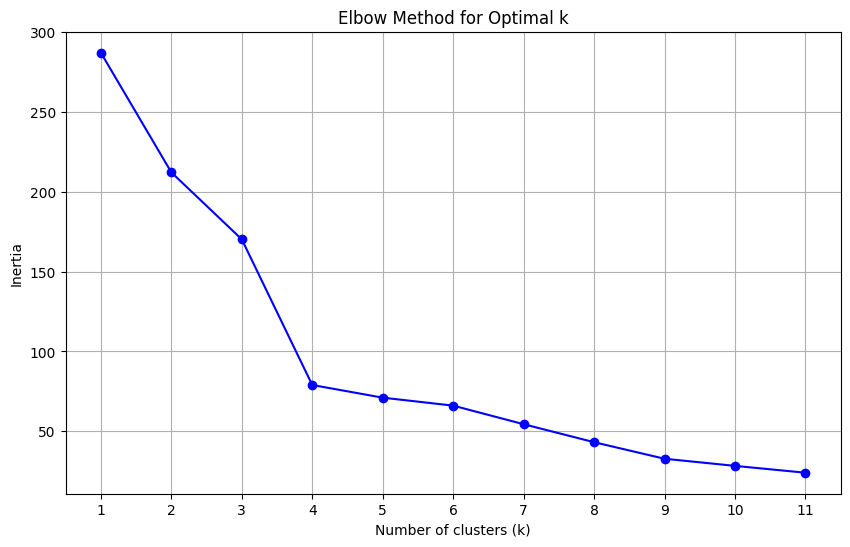

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** k=4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [14]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans
best_k = 4  

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [15]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [19]:
# Create a copy of the DataFrame
df_with_clusters = df_scaled.copy()


In [20]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled['cluster'] = predicted_clusters

# Display sample data
print(df_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [22]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas
scatter_plot = df_scaled.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d',
    color='cluster', 
    hover_cols=['cluster'],  # Use 'coin_id' or another identifier column if available
    colormap='Category10', 
    title='Cryptocurrency Clusters: 24h vs. 7d Price Change',
    height=500, 
    width=700
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [24]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed_data = pca.fit_transform(df_scaled.drop('cluster', axis=1))
df_pca = pd.DataFrame(data=pca_transformed_data, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)

# View the first five rows of the DataFrame. 
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [26]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

print(f"variance ratio of PC1: {explained_variance_ratio[0]:.2f}")
print(f"variance ratio of PC2: {explained_variance_ratio[1]:.2f}")
print(f"variance ratio of PC3: {explained_variance_ratio[2]:.2f}")

total_variance = explained_variance_ratio.sum() * 100
print(f"Total variance captured by the first three principal components: {total_variance:.2f}%")

variance ratio of PC1: 0.37
variance ratio of PC2: 0.35
variance ratio of PC3: 0.18
Total variance captured by the first three principal components: 89.50%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  PC1: Approximately 37.2%
PC2: Approximately 34.7%
PC3: Approximately 17.6%

In [27]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data as everything was already meet
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [28]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)


In [30]:
# Create an empty list to store the inertia values
inertia_values_pca = []



# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(df_pca)
    inertia_values_pca.append(kmeans_pca.inertia_)


In [31]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_pca_data = {'k': list(k_values), 'inertia': inertia_values_pca}
df_elbow_pca = pd.DataFrame(elbow_curve_pca_data)

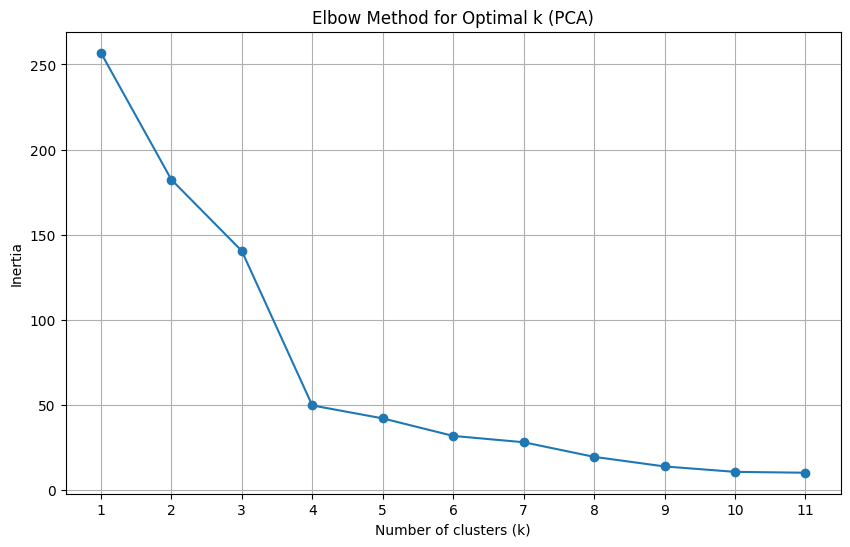

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (PCA)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k using the PCA data appears to be 4, as the elbow plot levels off after this point.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The best value for k does not differ between the PCA-transformed data and the original data; both suggest k=4 as the optimal number of clusters.





### Cluster Cryptocurrencies with K-means Using the PCA Data

In [33]:
# Initialize the K-Means model using the best value for k
best_k = 4

In [34]:
# Fit the K-Means model using the PCA data
kmeans_pca = KMeans(n_clusters=best_k, random_state=42)
kmeans_pca.fit(df_pca)


KMeans(n_clusters=4, random_state=42)

In [35]:
# Predict the clusters to group the cryptocurrencies using the PCA data
# Print the resulting array of cluster values.
predicted_clusters_pca = kmeans_pca.predict(df_pca)
print(predicted_clusters_pca)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [36]:
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
# Display sample data
df_pca_with_clusters['cluster'] = predicted_clusters_pca
print(df_pca_with_clusters.head())


                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [37]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_pca_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',
    hover_cols=df_pca_with_clusters.index.name,
    colormap='Category10',
    title='Cryptocurrency Clusters: PC1 vs PC2',
    height=500,
    width=700
)
scatter_plot_pca

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

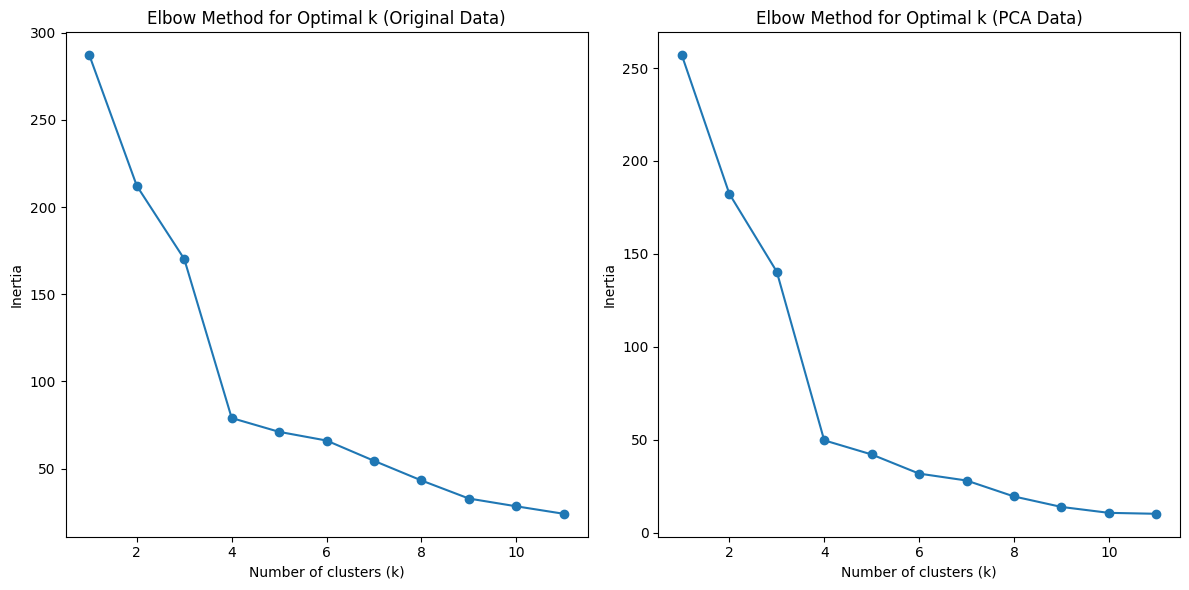

In [40]:
# Composite plot to contrast the Elbow curves
# Plotting with matplotlib instead of hvPlot
plt.figure(figsize=(12, 6))

# Original data Elbow curve
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k (Original Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# PCA data Elbow curve
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** By comparing elbow plots of both the original and PCA-reduced data, it's evident that PCA manages to retain the core traits of the data. The reduced feature set still allows for effective clustering, as shown by the clear "elbow," signaling an optimal cluster count similar to that of the full dataset. This indicates PCA's success in condensing the data to its most crucial features without compromising the integrity of the clustering. Consequently, the process becomes more efficient without sacrificing the quality of the clustering outcomes.